### EDA for Boston ###

- For Frame of Reference:
| Year   |      Start of DST      |  End of DST |
|----------|:-------------:|------:|
| 2016 | March 13 | November 6 |
| 2017 | March 12 | November 5 |
| 2018 | March 11 | November 4 |
| 2019 | March 10 | November 3 |
| 2020 | March 8 | November 2 |

source: https://en.wikipedia.org/wiki/Main_Page

**Imports**

In [77]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datetime as dt

### Reading In Data ###

In [2]:
#original data:
bos_df_og = pd.read_csv('../data/bos_accidents.csv')

In [3]:
bos_df_og.head(3)

id  severity           start_time             end_time  start_lat  \
0  A-2749150         2  2016-11-30 15:58:59  2016-11-30 21:58:59  41.879630   
1  A-2749199         2  2016-11-30 17:51:24  2016-11-30 23:51:24  42.619594   
2  A-2749201         2  2016-11-30 17:51:24  2016-11-30 23:51:24  42.610934   

   start_lng    end_lat    end_lng  distance(mi)  \
0 -71.377990  41.885180 -71.378500         0.384   
1 -71.125395  42.610934 -71.123411         0.607   
2 -71.123411  42.619594 -71.125395         0.607   

                            description  number      street side       city  \
0  At US-1/Broadway/Exit 29 - Accident.     NaN      I-95 N    R  Pawtucket   
1               At Gould Rd - Accident.   422.0   S Main St    L    Andover   
2    At Rattlesnake Hill Rd - Accident.    12.0    Gould Rd    L    Andover   

       county state     zipcode country    timezone airport_code  \
0  Providence    RI       02860      US  US/Eastern         KSFZ   
1       Essex    MA  01810-6135      US  US/Eastern         KLWM   
2       Essex    MA  01810-6215      US  US/Eastern         KLWM   

     weather_timestamp  temperature(f)  wind_chill(f)  humidity(%)  \
0  2016-11-30 15:56:00            46.9            NaN         97.0   
1  2016-11-30 17:54:00            45.0           40.6         97.0   
2  2016-11-30 17:54:00            45.0           40.6         97.0   

   pressure(in)  visibility(mi) wind_direction  wind_speed(mph)  \
0         30.01            10.0            ENE              9.2   
1         29.98             7.0           East              8.1   
2         29.98             7.0           East              8.1   

   precipitation(in) weather_condition  amenity   bump  crossing  give_way  \
0               0.02        Light Rain    False  False     False     False   
1               0.02        Light Rain    False  False     False     False   
2               0.02        Light Rain    False  False     False     False   

   junction  no_exit  railway  roundabout  station   stop  traffic_calming  \
0      True    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2     False    False    False       False    False  False            False   

   traffic_signal  turning_loop sunrise_sunset civil_twilight  \
0           False         False            Day            Day   
1           False         False          Night          Night   
2           False         False          Night          Night   

  nautical_twilight astronomical_twilight  
0               Day                   Day  
1             Night                   Day  
2             Night                   Day

In [4]:
bos_df_og.shape

(13283, 47)

In [5]:
bos_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [78]:
#cleaned data:
bos_df = pd.read_csv('../data/bos_df_cleaned.csv')

In [79]:
bos_df.head()

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  41.879630 -71.377990  41.885180 -71.378500         0.384   
1         2  42.619594 -71.125395  42.610934 -71.123411         0.607   
2         2  42.610934 -71.123411  42.619594 -71.125395         0.607   
3         2  41.797330 -71.403560  41.803290 -71.403790         0.412   
4         2  41.630260 -71.487240  41.625070 -71.487080         0.359   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            46.9           46.9         97.0         30.01            10.0   
1            45.0           40.6         97.0         29.98             7.0   
2            45.0           40.6         97.0         29.98             7.0   
3            48.0           48.0         89.0         29.89            10.0   
4            48.0           48.0         89.0         29.89            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              9.2               0.02        0     0         0         0   
1              8.1               0.02        0     0         0         0   
2              8.1               0.02        0     0         0         0   
3             10.4               0.00        0     0         0         0   
4             10.4               0.00        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         1        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   
3         0        0        0           0        0     0                0   
4         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  year  month  week  start_time_ep  \
0               0             0  2016     11    48   1.480522e+09   
1               0             0  2016     11    48   1.480528e+09   
2               0             0  2016     11    48   1.480528e+09   
3               0             0  2016     11    48   1.480531e+09   
4               0             0  2016     11    48   1.480531e+09   

    end_time_ep  weather_timestamp_ep  accident_duration  side_L  side_R  \
0  1.480543e+09          1.480521e+09            21600.0       0       1   
1  1.480550e+09          1.480528e+09            21600.0       1       0   
2  1.480550e+09          1.480528e+09            21600.0       1       0   
3  1.480552e+09          1.480531e+09            21600.0       0       1   
4  1.480552e+09          1.480531e+09            21600.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   1   
1                    0                 1                   0   
2                    0                 1                   0   
3                    0                 1                   0   
4                    0                 1                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   
3                   0                 0                  0   
4                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0           

In [8]:
bos_df.shape

(12178, 140)

In [9]:
bos_df.columns[:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'year', 'month',
       'week', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

### EDA ###

**Visualizations of Original Data**

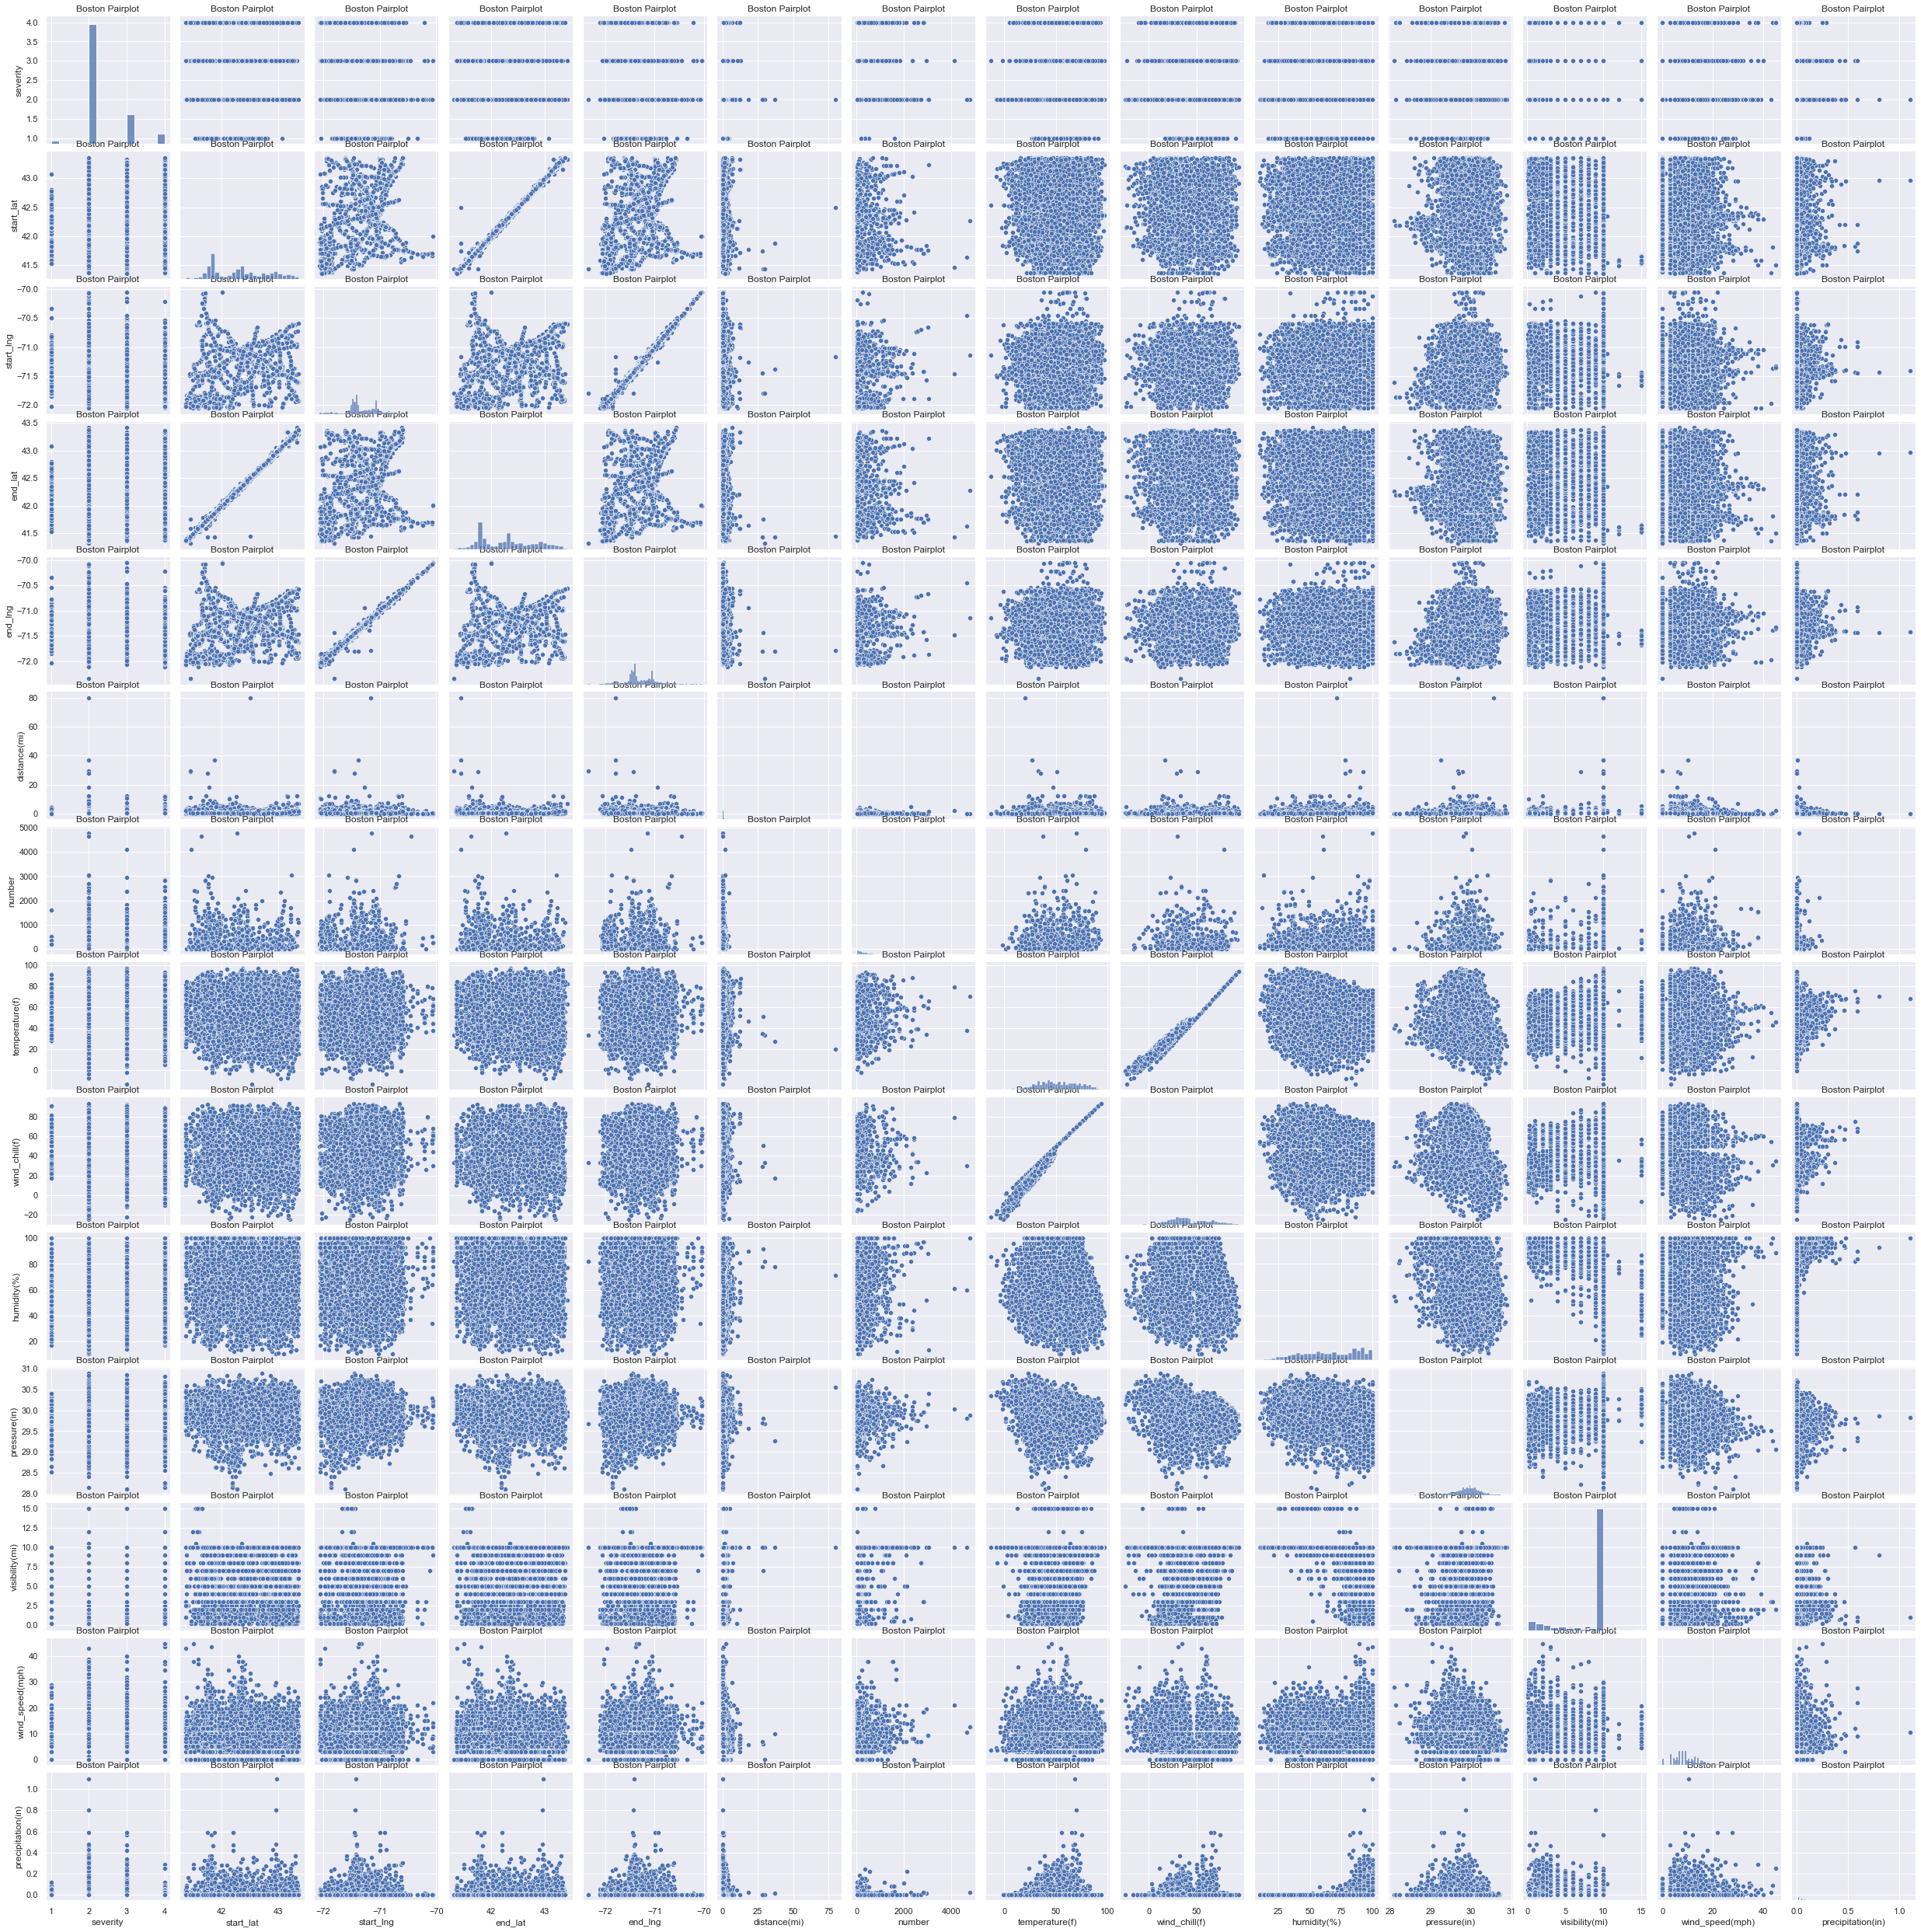

In [10]:
#pairplot for Boston
sns.pairplot(bos_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']]).set(title = 'Boston Pairplot');

#can't set color in pairplot?

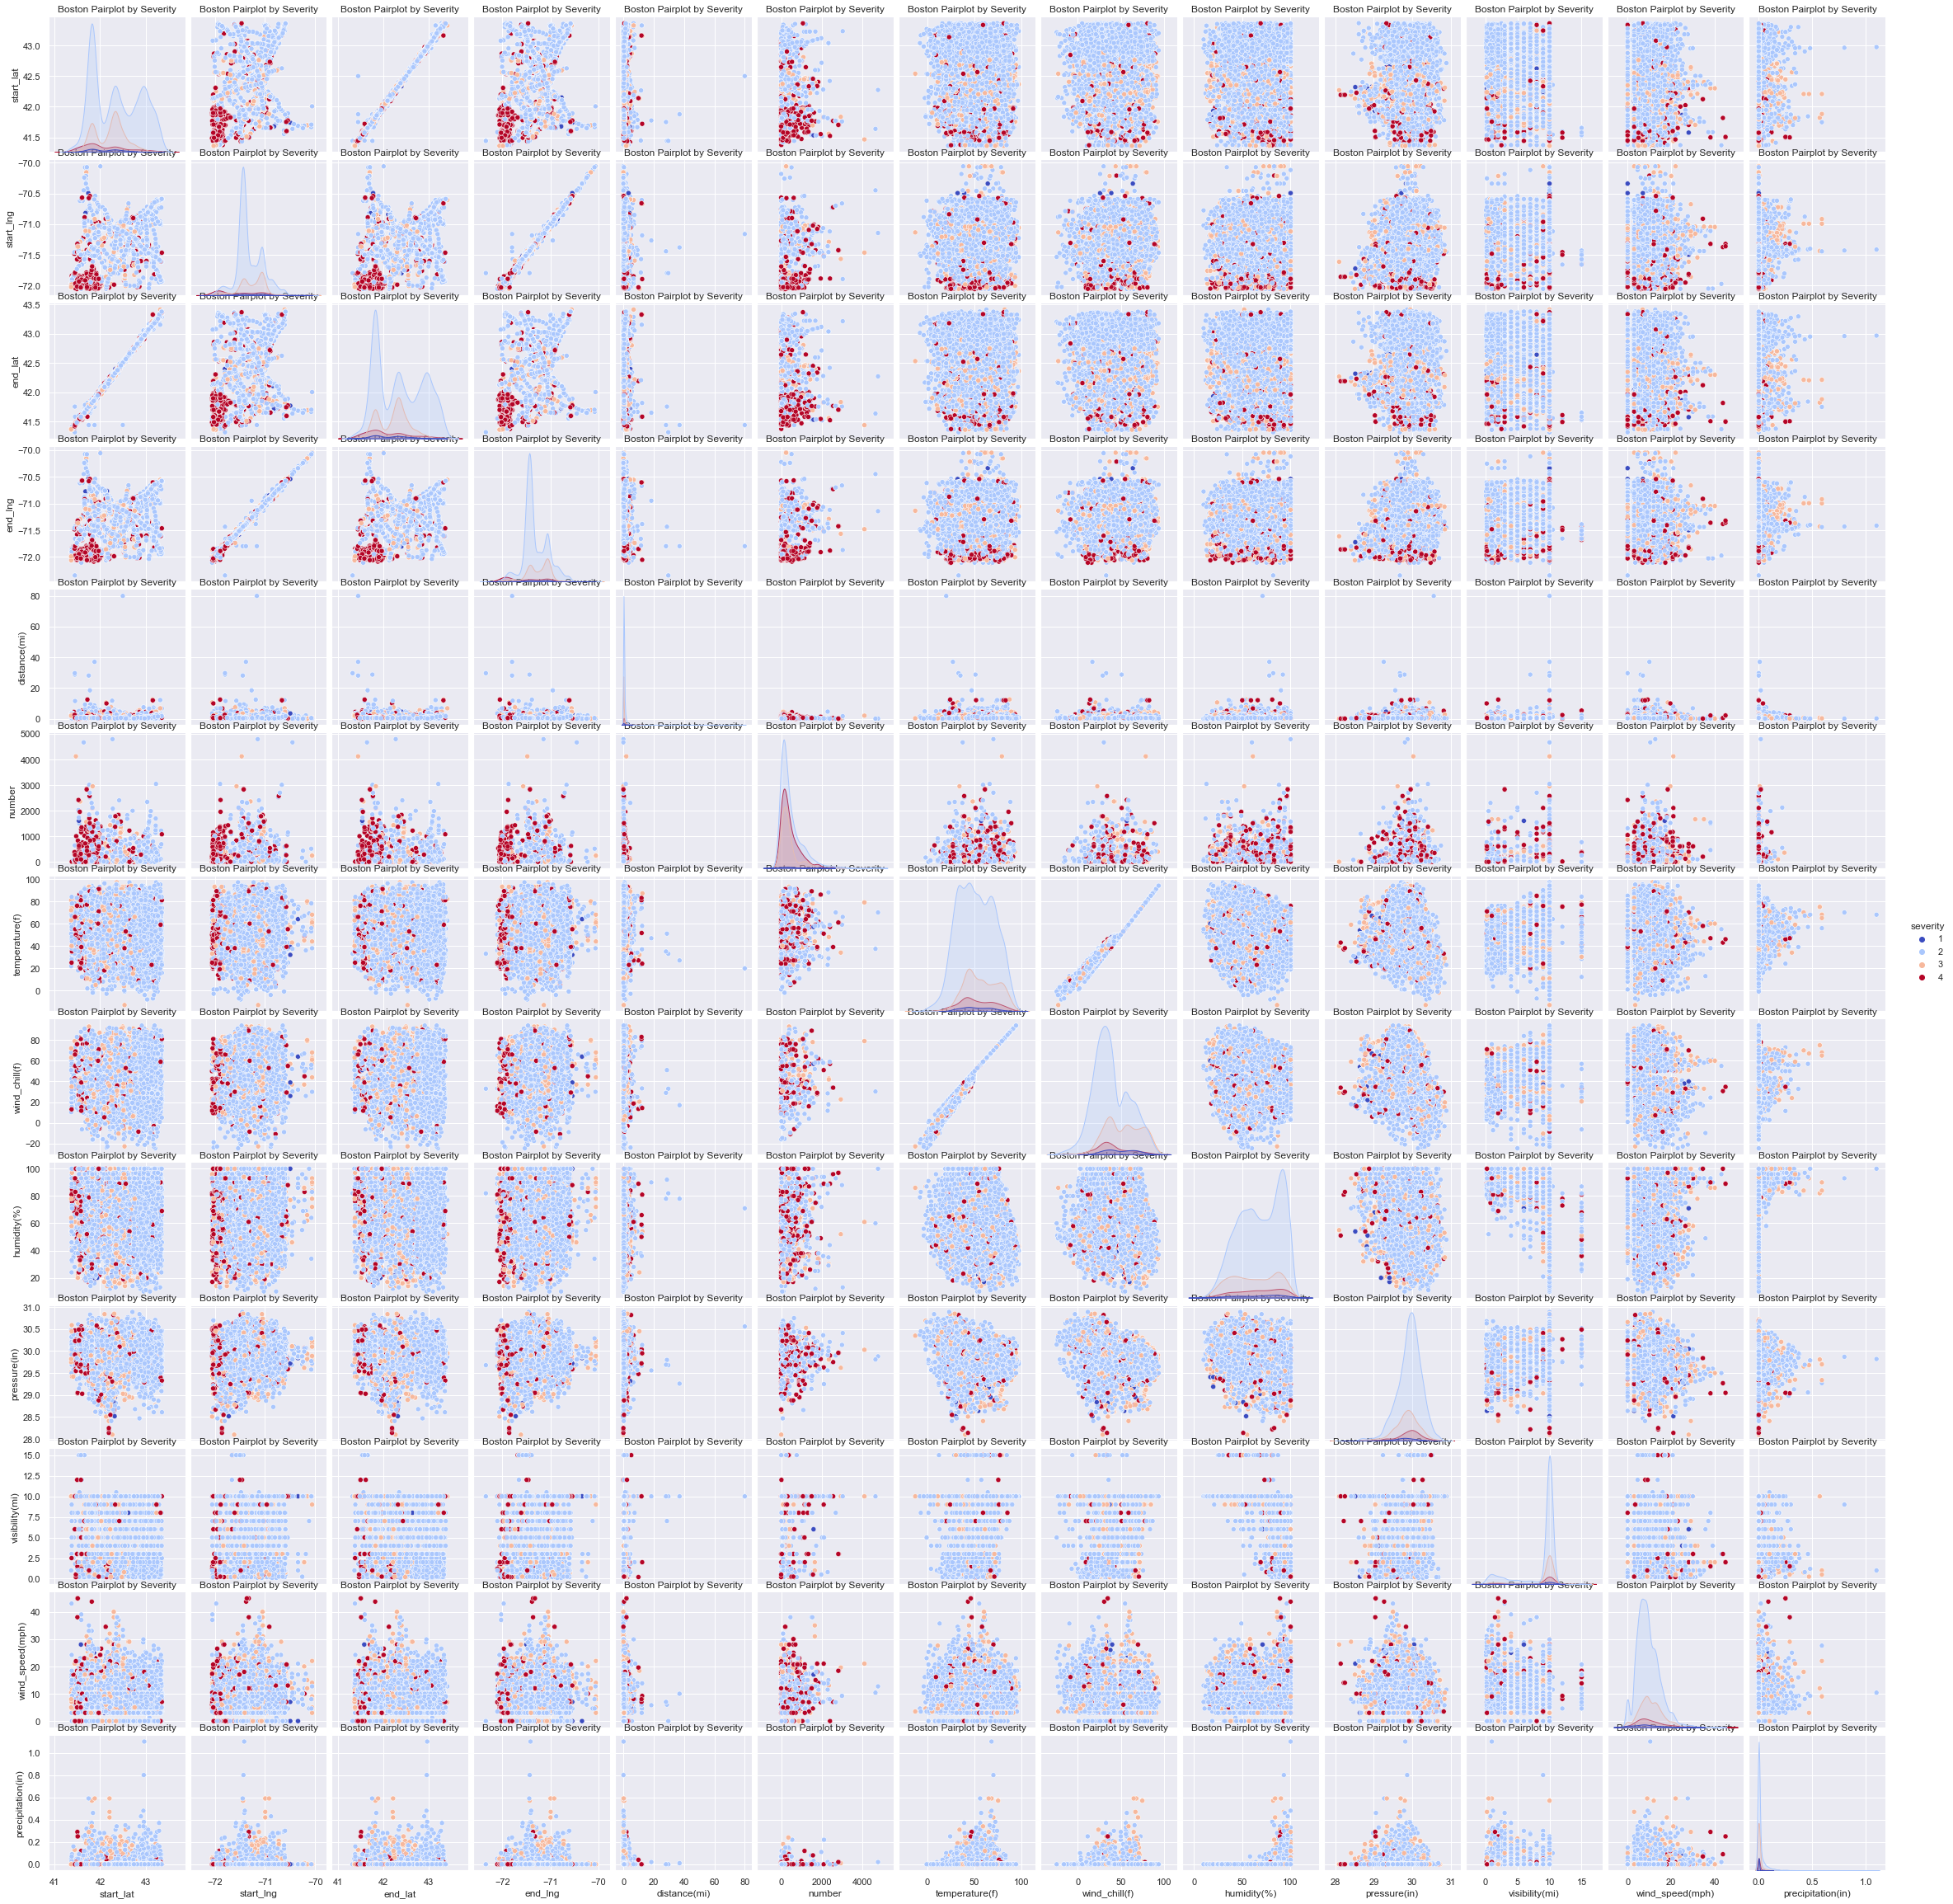

In [11]:
#pairplot for Boston, hued by Severity
sns.pairplot(bos_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']], hue = 'severity', palette = 'coolwarm').set(title= 'Boston Pairplot by Severity');

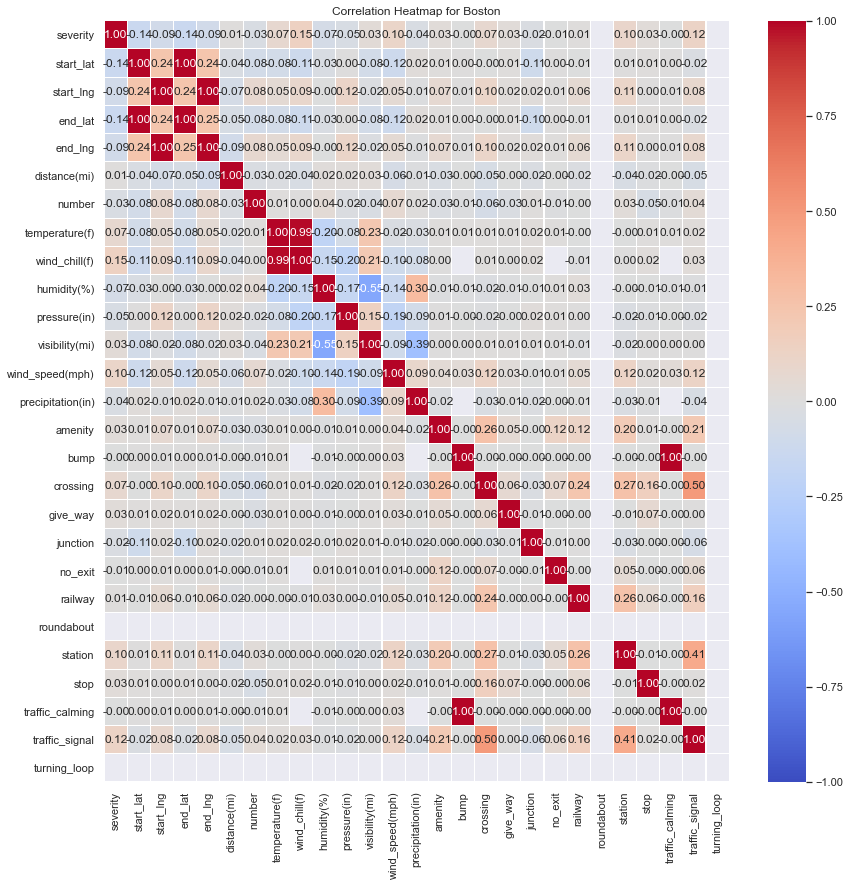

In [12]:
#corr heatmap for Boston
plt.figure(figsize = (14, 14))
sns.heatmap(bos_df_og.corr(),
            annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm')
plt.title('Correlation Heatmap for Boston');

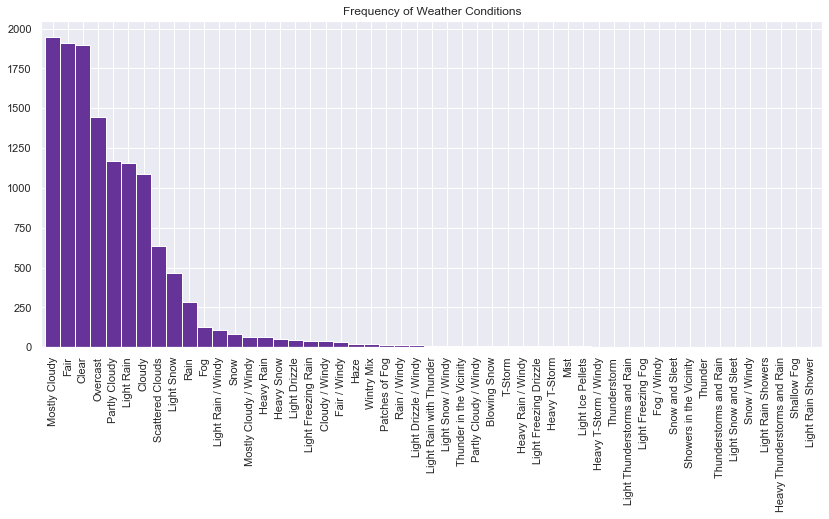

In [13]:
#bar plot of weather conditions for Boston
bos_df_og['weather_condition'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of Weather Conditions');

In [14]:
#renaming certain wind_direction values
bos_df_og['wind_direction'].replace({
        'North': 'N',
        'South': 'S',
        'West' : 'W',
        'East' : 'E',
        'Calm' : 'CALM',
        'Variable': 'VAR'
    }, inplace = True)

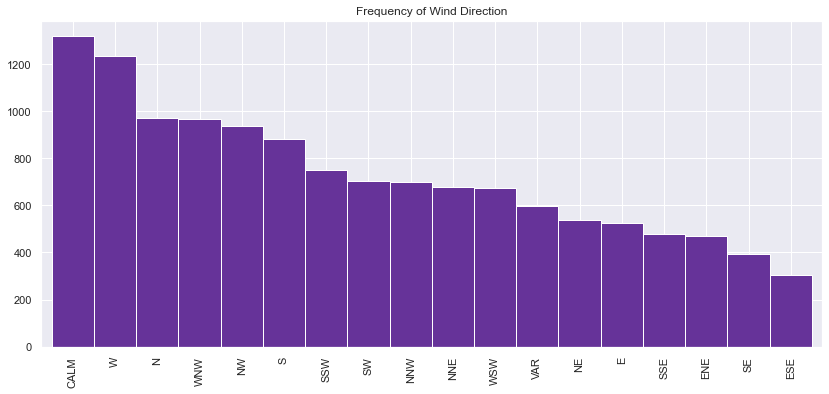

In [15]:
bos_df_og['wind_direction'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of Wind Direction');

In [16]:
bos_df_og['start_time'].sort_values()

1387    2016-03-23 05:33:48
1388    2016-03-23 05:33:48
1389    2016-03-23 07:59:48
1392    2016-03-23 08:01:05
1390    2016-03-23 08:01:05
               ...         
3529    2020-12-31 09:44:00
3988    2020-12-31 20:34:00
3455    2020-12-31 20:34:00
3673    2020-12-31 20:45:00
3944    2020-12-31 20:45:00
Name: start_time, Length: 13283, dtype: object

**Exploring Cleaned Data**

In [17]:
bos_df.shape

(12178, 140)

In [18]:
#descriptive statistics for Boston
bos_df[['severity', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep', 
        'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().drop('count').T

mean           std           min           25%  \
severity              2.287486e+00  6.026489e-01  1.000000e+00  2.000000e+00   
start_time_ep         1.538616e+09  4.309509e+07  1.458720e+09  1.501060e+09   
end_time_ep           1.538627e+09  4.308752e+07  1.458742e+09  1.501082e+09   
weather_timestamp_ep  1.538616e+09  4.309514e+07  1.458719e+09  1.501060e+09   
start_lat             4.233155e+01  5.070317e-01  4.136190e+01  4.182988e+01   
start_lng            -7.132173e+01  2.847564e-01 -7.205621e+01 -7.147456e+01   
end_lat               4.233188e+01  5.073252e-01  4.131951e+01  4.183021e+01   
end_lng              -7.132190e+01  2.854095e-01 -7.234417e+01 -7.147414e+01   
distance(mi)          5.189593e-01  1.259770e+00  0.000000e+00  3.000000e-02   
temperature(f)        5.241037e+01  1.906724e+01 -1.300000e+01  3.790000e+01   
wind_chill(f)         4.969651e+01  2.214574e+01 -2.450000e+01  3.200000e+01   
humidity(%)           6.661602e+01  2.208807e+01  1.000000e+01  4.900000e+01   
pressure(in)          2.990479e+01  3.268341e-01  2.810000e+01  2.973000e+01   
visibility(mi)        8.572601e+00  2.985276e+00  1.000000e-01  1.000000e+01   
wind_speed(mph)       9.594648e+00  5.236973e+00  0.000000e+00  6.000000e+00   
precipitation(in)     8.915257e-03  3.750204e-02  0.000000e+00  0.000000e+00   
accident_duration     1.129325e+04  1.288882e+04  4.800000e+02  1.764000e+03   

                               50%           75%           max  
severity              2.000000e+00  2.000000e+00  4.000000e+00  
start_time_ep         1.541535e+09  1.584615e+09  1.609448e+09  
end_time_ep           1.541537e+09  1.584617e+09  1.609457e+09  
weather_timestamp_ep  1.541536e+09  1.584615e+09  1.609448e+09  
start_lat             4.232364e+01  4.277420e+01  4.336114e+01  
start_lng            -7.139437e+01 -7.110840e+01 -7.006000e+01  
end_lat               4.232174e+01  4.277435e+01  4.341362e+01  
end_lng              -7.139444e+01 -7.110698e+01 -7.005199e+01  
distance(mi)          2.680000e-01  5.450000e-01  7.994600e+01  
temperature(f)        5.200000e+01  6.800000e+01  9.700000e+01  
wind_chill(f)         5.200000e+01  6.800000e+01  9.700000e+01  
humidity(%)           6.800000e+01  8.700000e+01  1.000000e+02  
pressure(in)          2.994000e+01  3.011000e+01  3.089000e+01  
visibility(mi)        1.000000e+01  1.000000e+01  1.500000e+01  
wind_speed(mph)       9.200000e+00  1.200000e+01  4.490000e+01  
precipitation(in)     0.000000e+00  0.000000e+00  1.100000e+00  
accident_duration     5.400000e+03  2.160000e+04  3.454750e+05

In [19]:
bos_df['severity'].value_counts(normalize = True).sort_index()

1    0.015109
2    0.746346
3    0.174495
4    0.064050
Name: severity, dtype: float64

Exploring the frequency of accidents:

In [20]:
#function to generate count plots
def make_countplot(dataframe,
                   x, y = None,
                   hue = None,
                   palette = None):
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette)

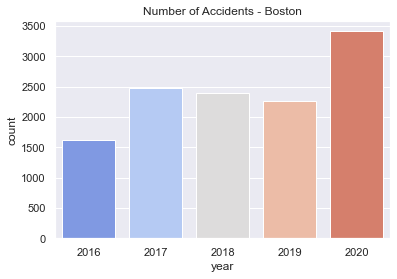

In [21]:
#Overall number of Accidents - Boston
make_countplot(bos_df, 'year', palette = 'coolwarm')
plt.title('Number of Accidents - Boston')
plt.show();

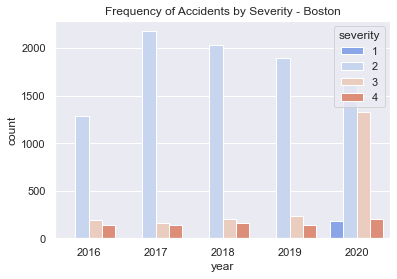

In [22]:
#Frequency of Accidents by Sev. for Boston
make_countplot(bos_df, x = 'year', hue = 'severity', palette = 'coolwarm')
plt.title('Frequency of Accidents by Severity - Boston')
plt.show();

In [23]:
#function to generate histplots
def make_histplot(dataframe, x, y = None, color = None, kde = True):
    sns.histplot(data = dataframe, x = x, y = y, color = color, kde = kde)
    plt.title('Frequency of Accidents by Week')
    return plt.show()

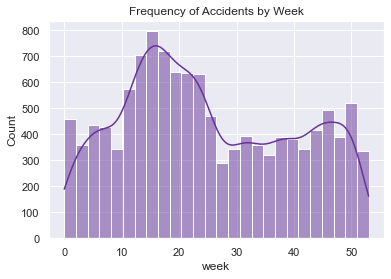

In [24]:
make_histplot(bos_df, x = 'week', color = 'rebeccapurple')

In [25]:
#function to generate kdeplots
def make_kdeplot(dataframe,
                 shade = True,
                 color = None):
    
    return sns.kdeplot(data = dataframe,
                shade = shade,
                color = color);

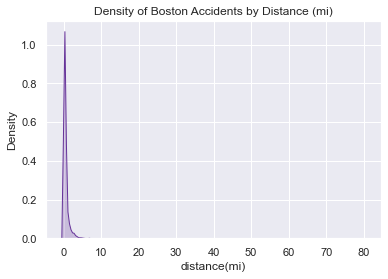

In [26]:
#kde plot for Boston's distance
make_kdeplot(bos_df['distance(mi)'], color = 'rebeccapurple')
plt.title('Density of Boston Accidents by Distance (mi)')
plt.show()

In [27]:
bos_df['distance(mi)'].min()

0.0

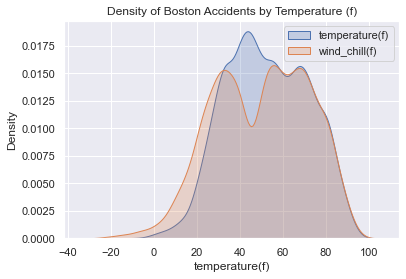

In [28]:
#Looking at weather variables for Boston

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables
fig = make_kdeplot(bos_df['temperature(f)'], shade = True)
fig = make_kdeplot(bos_df['wind_chill(f)'], shade = True)
plt.title('Density of Boston Accidents by Temperature (f)')
plt.legend(labels = ['temperature(f)', 'wind_chill(f)'])
plt.show()

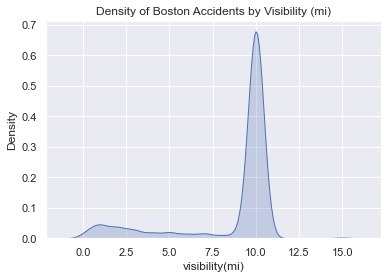

In [29]:
#kde plot for Boston's visbility distance
make_kdeplot(bos_df['visibility(mi)'])
plt.title('Density of Boston Accidents by Visibility (mi)')
plt.show()

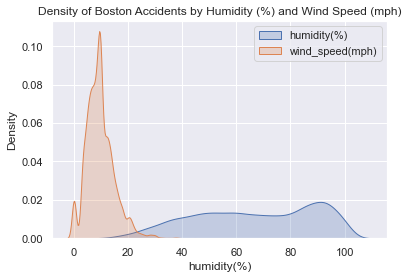

In [30]:
#combined kde plots for Boston's humidity(%), and wind_speed(mph)
fig = make_kdeplot(bos_df['humidity(%)'])
fig = make_kdeplot(bos_df['wind_speed(mph)'])
plt.title('Density of Boston Accidents by Humidity (%) and Wind Speed (mph)')
plt.legend(labels = ['humidity(%)', 'wind_speed(mph)'])
plt.show()

**Trying to Plot the 'Shape' of the Cities**

In [31]:
#https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/titles_demo.html

#function to generate jointplots
def make_jointplot(x, y,
                   kind = 'kde',
                   fill = True, 
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         fill = fill,
                         color = color)

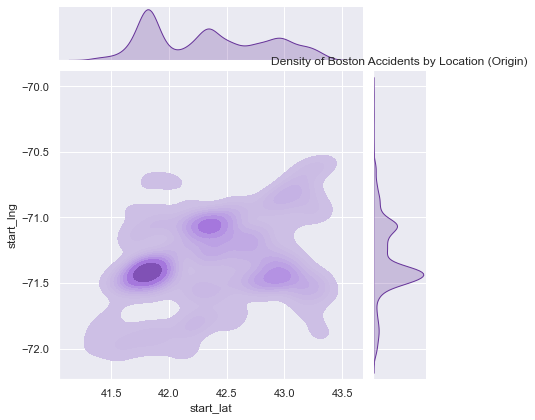

In [32]:
#Density of Bostons's accidents
make_jointplot(x = bos_df["start_lat"], y=bos_df["start_lng"], kind='kde', fill = True, color = 'rebeccapurple')
plt.title('Density of Boston Accidents by Location (Origin)')
plt.show()

In [33]:
#function to generate jointplots - hex kind
def make_jointplothex(x, y,
                   kind = 'hex',
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         color = color)

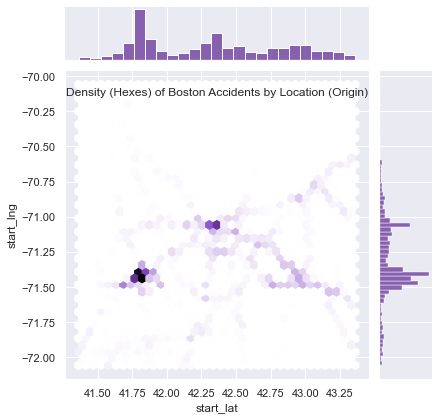

In [34]:
#Density of Boston's accidents - hexes
make_jointplothex(x = bos_df["start_lat"],
                  y = bos_df["start_lng"],
                  kind = 'hex',
                  color = 'rebeccapurple')
plt.title('Density (Hexes) of Boston Accidents by Location (Origin)',
          y = 0.90)
plt.show();

In [35]:
#function to generate scatterplots
def make_scatterplot(x, y, s, alpha):
    #setting figure size
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot
    return plt.scatter(x = x,
                       y = y,
                       s = s,
                       alpha = 0.5)

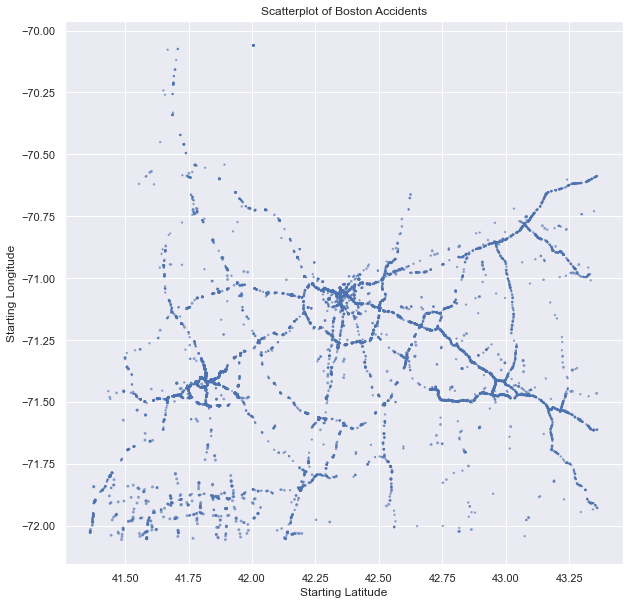

In [36]:
#scatterplot of Boston
make_scatterplot(x = bos_df['start_lat'],
                 y = bos_df['start_lng'],
                 s = bos_df['severity'],
                 alpha = 0.5)
plt.title('Scatterplot of Boston Accidents');

In [37]:
#function to generate hued scatterplots
def make_hued_scatterplot(x, y, c, cmap, alpha):
    #setting figure size:
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels:
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot:
    scatter = plt.scatter(x = x,
                          y = y,
                          c = c,
                          cmap = cmap,
                          alpha = 0.5)
    
    #setting legend:
    plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
    
    #making plot
    return scatter

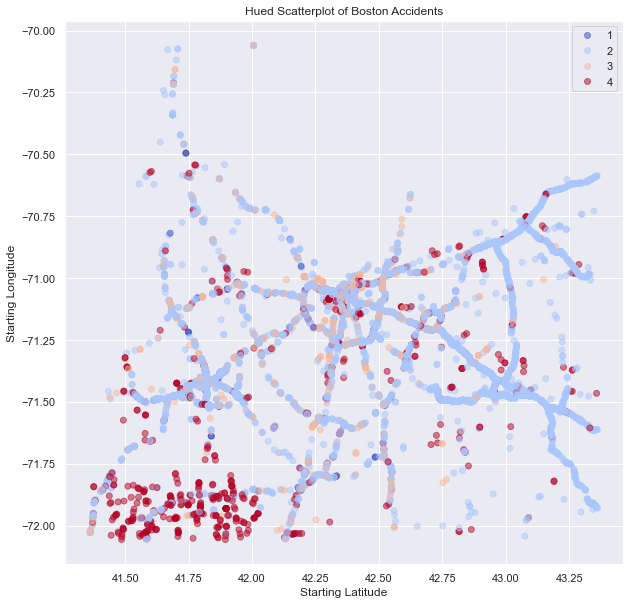

In [38]:
make_hued_scatterplot(x = bos_df["start_lat"],
                      y = bos_df["start_lng"],
                      c = bos_df['severity'],
                      cmap = 'coolwarm',
                      alpha = 0.5)
plt.title('Hued Scatterplot of Boston Accidents');

**Exploring Time Intervals**

- For Frame of Reference

| Human-readable Time |      Seconds      |
|----------|:-------------:|
| 1 hour | 3600 seconds |
| 1 day | 86400 seconds |
| 1 week | 604800 seconds |
| 1 month (30.44 days) | 2629743 seconds |
| 1 hour (365.24 days) | 31556926 seconds |

source: https://www.epochconverter.com/

In [39]:
bos_df_time_convert = pd.to_datetime(bos_df['start_time_ep'], unit = 's')
bos_df_time_convert = pd.DataFrame(bos_df_time_convert)
bos_df_time_convert.head(3)

start_time_ep
0 2016-11-30 15:58:59
1 2016-11-30 17:51:24
2 2016-11-30 17:51:24

In [40]:
bos_df_time_convert.rename(columns = {'start_time_ep': 'start_time'}, inplace = True)
bos_df_time_convert.head()

start_time
0 2016-11-30 15:58:59
1 2016-11-30 17:51:24
2 2016-11-30 17:51:24
3 2016-11-30 18:33:17
4 2016-11-30 18:33:17

In [41]:
bos_df_time_convert = bos_df_time_convert.sort_values('start_time')
bos_df_time_convert.head()

start_time
1310 2016-03-23 07:59:48
1312 2016-03-23 08:01:05
1313 2016-03-23 08:01:05
1311 2016-03-23 08:01:05
1314 2016-03-23 09:03:22

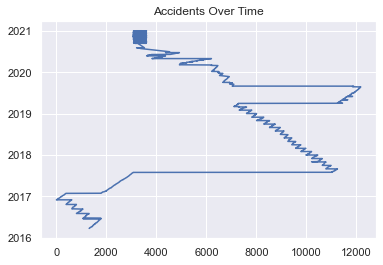

In [42]:
#https://www.python-graph-gallery.com/242-area-chart-and-faceting
plt.plot(bos_df_time_convert)
plt.title("Accidents Over Time");

In [43]:
bos_df.columns[0:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'year', 'month',
       'week', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

In [44]:
#trying to pinpoint the 'average' accident severity and location:
mean_accident_loc = bos_df[['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng']].mean()
loc_dict = dict(mean_accident_loc)
loc_dict

{'severity': 2.2874856298242734,
 'start_lat': 42.33154651790119,
 'start_lng': -71.3217335703723,
 'end_lat': 42.331884400968704,
 'end_lng': -71.32189689152608}

In [45]:
print(loc_dict.keys())
print(loc_dict.values())

dict_keys(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
dict_values([2.2874856298242734, 42.33154651790119, -71.3217335703723, 42.331884400968704, -71.32189689152608])


**Looking At Individual Years, Months, and Days of DST**

In [75]:
bos_2016 = bos_df.loc[bos_df['year'] == 2016]
bos_2017 = bos_df.loc[bos_df['year'] == 2017]
bos_2018 = bos_df.loc[bos_df['year'] == 2018]
bos_2019 = bos_df.loc[bos_df['year'] == 2019]
bos_2020 = bos_df.loc[bos_df['year'] == 2020]

In [47]:
print(bos_2016.shape[0])
print(bos_2017.shape[0])
print(bos_2018.shape[0])
print(bos_2019.shape[0])
print(bos_2020.shape[0])

1620
2486
2391
2267
3414


In [48]:
bos_2016.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  41.879630 -71.377990  41.885180 -71.378500         0.384   
1         2  42.619594 -71.125395  42.610934 -71.123411         0.607   
2         2  42.610934 -71.123411  42.619594 -71.125395         0.607   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            46.9           46.9         97.0         30.01            10.0   
1            45.0           40.6         97.0         29.98             7.0   
2            45.0           40.6         97.0         29.98             7.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              9.2               0.02        0     0         0         0   
1              8.1               0.02        0     0         0         0   
2              8.1               0.02        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         1        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  year  month  week  start_time_ep  \
0               0             0  2016     11    48   1.480522e+09   
1               0             0  2016     11    48   1.480528e+09   
2               0             0  2016     11    48   1.480528e+09   

    end_time_ep  weather_timestamp_ep  accident_duration  side_L  side_R  \
0  1.480543e+09          1.480521e+09            21600.0       0       1   
1  1.480550e+09          1.480528e+09            21600.0       1       0   
2  1.480550e+09          1.480528e+09            21600.0       1       0   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   1   
1                    0                 1                   0   
2                    0                 1                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Fair  weather_condition_Fair / Windy  \
0                       0                               0   
1                       0                  

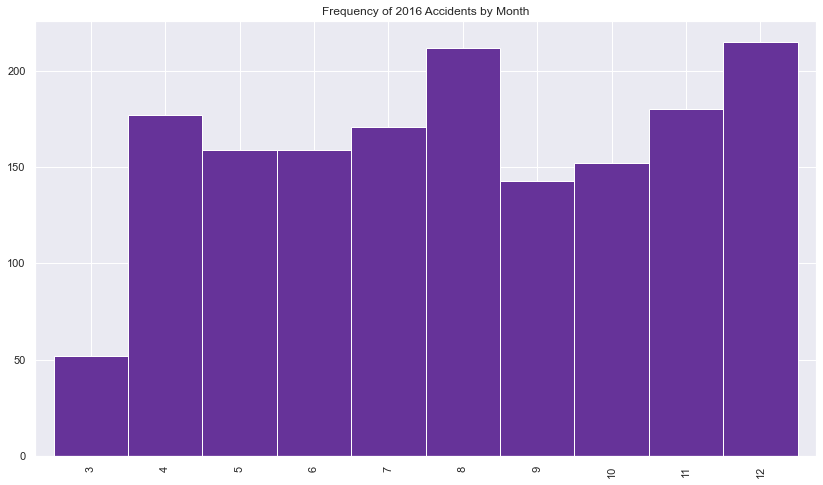

In [49]:
bos_2016['month'].value_counts().sort_index().plot(kind = 'bar',
                                    figsize=(14, 8),
                                    width = 1,
                                    color = 'rebeccapurple',
                                    title = 'Frequency of 2016 Accidents by Month');

In [50]:
bos_2017.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
221         4  41.899002 -72.004979  41.895111 -72.056182         2.647   
222         4  41.895111 -72.056182  41.899002 -72.004979         2.647   
223         2  43.162353 -71.517776  43.154039 -71.507215         0.783   

     temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
221            39.0           36.8         82.0         29.89            10.0   
222            39.0           36.8         82.0         29.89            10.0   
223            33.8           30.8         87.0         29.81            10.0   

     wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
221              3.5                0.0        0     0         0         0   
222              3.5                0.0        0     0         0         0   
223              3.5                0.0        0     0         0         0   

     junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
221         0        0        0           0        0     0                0   
222         0        0        0           0        0     0                0   
223         0        0        0           0        0     0                0   

     traffic_signal  turning_loop  year  month  week  start_time_ep  \
221               0             0  2017      1     1   1.483229e+09   
222               0             0  2017      1     1   1.483229e+09   
223               0             0  2017      1     1   1.483234e+09   

      end_time_ep  weather_timestamp_ep  accident_duration  side_L  side_R  \
221  1.483250e+09          1.483232e+09            21600.0       1       0   
222  1.483250e+09          1.483232e+09            21600.0       1       0   
223  1.483256e+09          1.483235e+09            21600.0       0       1   

     wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
221                    0                 0                   0   
222                    0                 0                   0   
223                    0                 0                   0   

     wind_direction_ESE  wind_direction_N  wind_direction_NE  \
221                   0                 0                  0   
222                   0                 0                  0   
223                   0                 0                  0   

     wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
221                   0                   0                  0   
222                   0                   0                  0   
223                   0                   0                  0   

     wind_direction_S  wind_direction_SE  wind_direction_SSE  \
221                 1                  0                   0   
222                 1                  0                   0   
223                 0                  1                   0   

     wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
221                   0                  0                   0   
222                   0                  0                   0   
223                   0                  0                   0   

     wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
221                 0                   0                   0   
222                 0                   0                   0   
223                 0                   0                   0   

     weather_condition_Blowing Snow  weather_condition_Clear  \
221                               0                        0   
222                               0                        0   
223                               0                        0   

     weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
221                         0                                 0   
222                         0                                 0   
223                         0                                 0   

     weather_condition_Fair  weather_condition_Fair / W

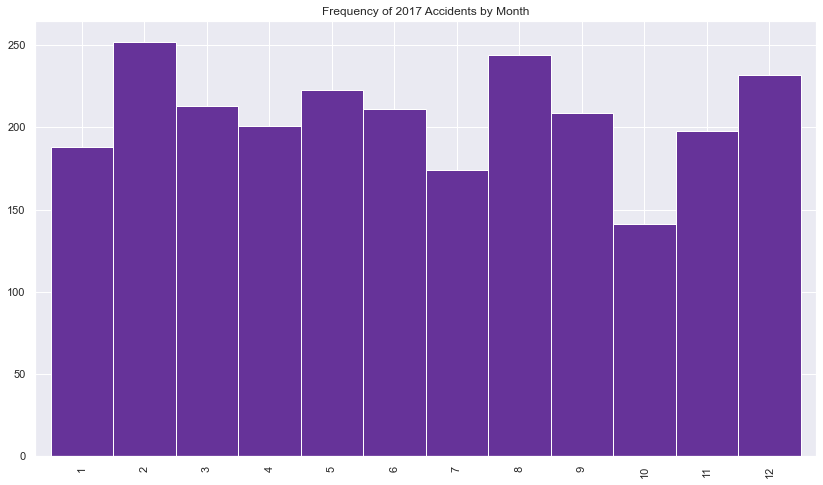

In [51]:
bos_2017['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of 2017 Accidents by Month');

In [52]:
bos_2018.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
7816         2  42.940236 -71.385284  42.942054 -71.386795         0.147   
7817         2  41.829580 -71.418010  41.825990 -71.419270         0.256   
7818         2  41.789680 -71.418400  41.786130 -71.421830         0.302   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
7816            32.0           27.5         75.0         30.01   
7817            25.0           19.3         92.0         29.86   
7818            30.0           24.1         85.0         30.05   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
7816            10.0              4.6                0.0        0     0   
7817            10.0              4.6                0.0        0     0   
7818            10.0              5.8                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
7816         0         0         0        0        0           0        0   
7817         0         0         0        0        0           0        0   
7818         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  year  month  week  \
7816     0                0               0             0  2018     11    47   
7817     0                0               0             0  2018     11    47   
7818     0                0               0             0  2018     11    47   

      start_time_ep   end_time_ep  weather_timestamp_ep  accident_duration  \
7816   1.543545e+09  1.543546e+09          1.543546e+09             1776.0   
7817   1.543561e+09  1.543563e+09          1.543561e+09             1782.0   
7818   1.543566e+09  1.543568e+09          1.543564e+09             1778.0   

      side_L  side_R  wind_direction_CALM  wind_direction_E  \
7816       0       1                    0                 0   
7817       0       1                    0                 0   
7818       0       1                    0                 0   

      wind_direction_ENE  wind_direction_ESE  wind_direction_N  \
7816                   0                   0                 0   
7817                   0                   0                 0   
7818                   0                   0                 0   

      wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
7816                  0                   0                   0   
7817                  0                   0                   0   
7818                  0                   0                   0   

      wind_direction_NW  wind_direction_S  wind_direction_SE  \
7816                  0                 0                  0   
7817                  0                 0                  0   
7818                  0                 0                  0   

      wind_direction_SSE  wind_direction_SSW  wind_direction_SW  \
7816                   0                   0                  0   
7817                   0                   0                  0   
7818                   0                   0                  0   

      wind_direction_VAR  wind_direction_W  wind_direction_WNW  \
7816                   0                 0                   1   
7817                   0                 1                   0   
7818                   0                 1                   0   

      wind_direction_WSW  weather_condition_Blowing Snow  \
7816                   0                               0   
7817                   0                               0   
7818                   0                               0   

      weather_condition_Clear  weather_condition_Cloudy  \
7816                        1                         0   
7817                        1                         0   
7818                        0                         0   

      weather_condition_Cloudy / Windy  weather_condition_Fair  \
7816                                 0                       0   
7817

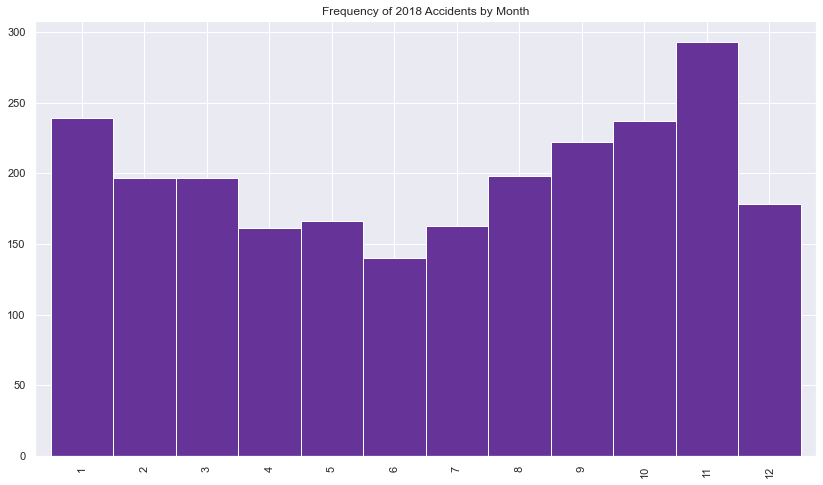

In [53]:
bos_2018['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of 2018 Accidents by Month');

In [54]:
bos_2019.head(3)

severity  start_lat  start_lng   end_lat   end_lng  distance(mi)  \
6483         2   41.82518  -71.51558  41.81919 -71.50568         0.657   
6484         2   42.96121  -71.41002  42.96121 -71.41002         0.000   
6485         2   42.31210  -71.37913  42.31299 -71.38511         0.312   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
6483            34.0           34.0         85.0         29.61   
6484            30.0           30.0         75.0         29.78   
6485            41.0           36.0         62.0         29.89   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
6483            10.0              3.0                0.0        0     0   
6484            10.0              0.0                0.0        0     0   
6485            10.0              8.0                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
6483         0         0         0        0        0           0        0   
6484         0         0         0        0        0           0        0   
6485         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  year  month  week  \
6483     0                0               0             0  2019     12    51   
6484     0                0               0             0  2019     12    51   
6485     0                0               0             0  2019     12    51   

      start_time_ep   end_time_ep  weather_timestamp_ep  accident_duration  \
6483   1.577086e+09  1.577088e+09          1.577088e+09             1763.0   
6484   1.577094e+09  1.577096e+09          1.577095e+09             1778.0   
6485   1.577094e+09  1.577096e+09          1.577095e+09             1700.0   

      side_L  side_R  wind_direction_CALM  wind_direction_E  \
6483       0       1                    0                 0   
6484       0       1                    1                 0   
6485       0       1                    0                 0   

      wind_direction_ENE  wind_direction_ESE  wind_direction_N  \
6483                   0                   0                 0   
6484                   0                   0                 0   
6485                   0                   0                 0   

      wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
6483                  0                   0                   0   
6484                  0                   0                   0   
6485                  0                   0                   0   

      wind_direction_NW  wind_direction_S  wind_direction_SE  \
6483                  0                 0                  0   
6484                  0                 0                  0   
6485                  0                 0                  0   

      wind_direction_SSE  wind_direction_SSW  wind_direction_SW  \
6483                   0                   0                  1   
6484                   0                   0                  0   
6485                   0                   0                  1   

      wind_direction_VAR  wind_direction_W  wind_direction_WNW  \
6483                   0                 0                   0   
6484                   0                 0                   0   
6485                   0                 0                   0   

      wind_direction_WSW  weather_condition_Blowing Snow  \
6483                   0                               0   
6484                   0                               0   
6485                   0                               0   

      weather_condition_Clear  weather_condition_Cloudy  \
6483                        0                         0   
6484                        0                         0   
6485                        0                         0   

      weather_condition_Cloudy / Windy  weather_condition_Fair  \
6483                                 0                       1   
6484        

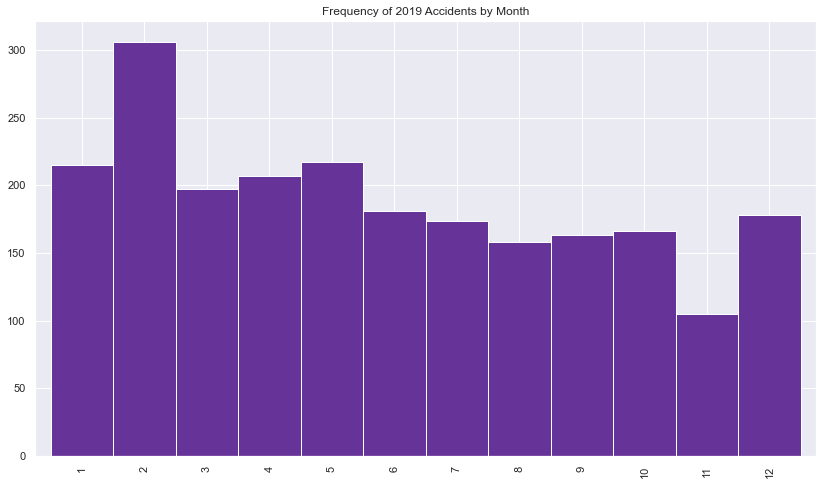

In [55]:
bos_2019['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of 2019 Accidents by Month');

In [56]:
bos_2020.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
3069         2  42.454916 -71.753007  42.459876 -71.743517         0.593   
3070         2  42.664214 -71.193906  42.664364 -71.194276         0.021   
3071         2  41.780778 -71.424969  41.767248 -71.429940         0.969   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
3069            58.0           58.0         72.0         29.95   
3070            41.0           41.0        100.0         29.86   
3071            47.0           41.0         77.0         30.31   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
3069           10.00              6.0                0.0        0     0   
3070            0.25              3.0                0.0        0     0   
3071           10.00             14.0                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
3069         0         0         0        0        0           0        0   
3070         0         0         1        0        0           0        0   
3071         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  year  month  week  \
3069     0                0               0             0  2020     10    42   
3070     0                0               0             0  2020     11    47   
3071     0                0               0             0  2020     11    46   

      start_time_ep   end_time_ep  weather_timestamp_ep  accident_duration  \
3069   1.603133e+09  1.603150e+09          1.603134e+09            17045.0   
3070   1.606433e+09  1.606442e+09          1.606431e+09             8930.0   
3071   1.605822e+09  1.605827e+09          1.605823e+09             5901.0   

      side_L  side_R  wind_direction_CALM  wind_direction_E  \
3069       0       1                    0                 0   
3070       0       1                    0                 0   
3071       0       1                    0                 0   

      wind_direction_ENE  wind_direction_ESE  wind_direction_N  \
3069                   0                   1                 0   
3070                   0                   0                 0   
3071                   0                   0                 0   

      wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
3069                  0                   0                   0   
3070                  0                   0                   0   
3071                  0                   0                   0   

      wind_direction_NW  wind_direction_S  wind_direction_SE  \
3069                  0                 0                  0   
3070                  0                 0                  0   
3071                  0                 0                  0   

      wind_direction_SSE  wind_direction_SSW  wind_direction_SW  \
3069                   0                   0                  0   
3070                   0                   0                  0   
3071                   0                   0                  1   

      wind_direction_VAR  wind_direction_W  wind_direction_WNW  \
3069                   0                 0                   0   
3070                   0                 0                   0   
3071                   0                 0                   0   

      wind_direction_WSW  weather_condition_Blowing Snow  \
3069                   0                               0   
3070                   1                               0   
3071                   0                               0   

      weather_condition_Clear  weather_condition_Cloudy  \
3069                        0                         1   
3070                        0                         0   
3071                        0                         0   

      weather_condition_Cloudy / Windy  weather_condition_Fair  \
3069                                 0                       0   
3070

In [57]:
bos_2020['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Frequency of 2020 Accidents by Month');

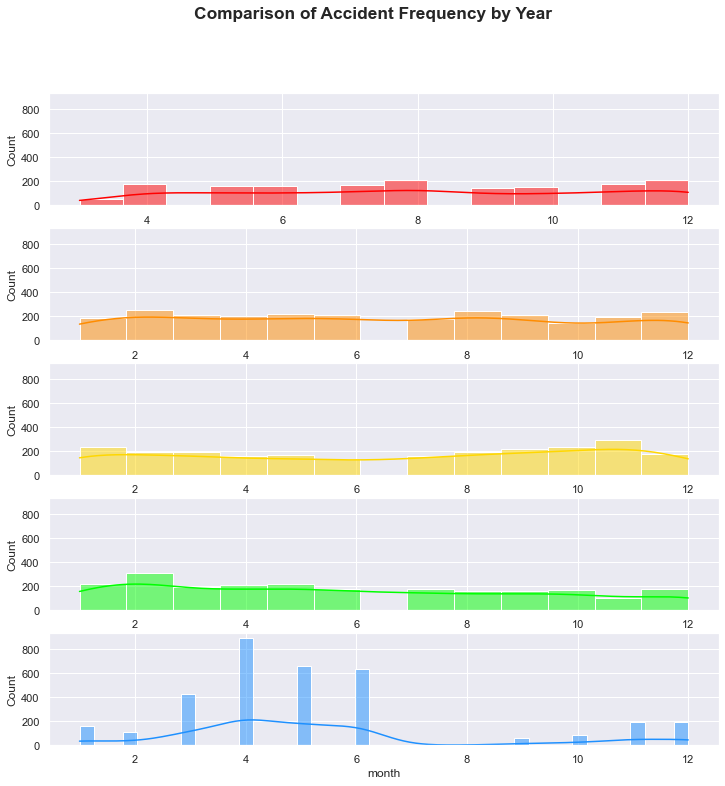

In [81]:
#setting up subplots and figsize:
fig, axs = plt.subplots(5, 1, sharey = True, figsize=(12, 12))

#setting title for 'overall' plot
fig.suptitle('Comparison of Accident Frequency by Year',
               fontsize = 'x-large', 
               fontweight = 'bold' )

#individual subplots:
sns.histplot(data=bos_2016, x="month", color="red", kde=True, ax=axs[0])
sns.histplot(data=bos_2017, x="month", color="darkorange", kde=True, ax=axs[1])
sns.histplot(data=bos_2018, x="month", color="gold", kde=True, ax=axs[2])
sns.histplot(data=bos_2019, x="month", color="lime", kde=True, ax=axs[3])
sns.histplot(data=bos_2020, x="month", color="dodgerblue", kde=True, ax=axs[4])

#displaying plot:
plt.show()

In [58]:
#the earliest available dates are in March 2016
#but not as early as DST

bos_2016_11 = bos_2016.loc[bos_2016['month'] == 11]
bos_2016_11.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  41.879630 -71.377990  41.885180 -71.378500         0.384   
1         2  42.619594 -71.125395  42.610934 -71.123411         0.607   
2         2  42.610934 -71.123411  42.619594 -71.125395         0.607   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            46.9           46.9         97.0         30.01            10.0   
1            45.0           40.6         97.0         29.98             7.0   
2            45.0           40.6         97.0         29.98             7.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              9.2               0.02        0     0         0         0   
1              8.1               0.02        0     0         0         0   
2              8.1               0.02        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         1        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  year  month  week  start_time_ep  \
0               0             0  2016     11    48   1.480522e+09   
1               0             0  2016     11    48   1.480528e+09   
2               0             0  2016     11    48   1.480528e+09   

    end_time_ep  weather_timestamp_ep  accident_duration  side_L  side_R  \
0  1.480543e+09          1.480521e+09            21600.0       0       1   
1  1.480550e+09          1.480528e+09            21600.0       1       0   
2  1.480550e+09          1.480528e+09            21600.0       1       0   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   1   
1                    0                 1                   0   
2                    0                 1                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Fair  weather_condition_Fair / Windy  \
0                       0                               0   
1                       0                  

In [59]:
bos_2017_03 = bos_2017.loc[bos_2017['month'] == 3]
#bos_2017_03.head(3)

bos_2017_11 = bos_2017.loc[bos_2017['month'] == 11]
#bos_2017_11.head(3)

In [60]:
bos_2018_03 = bos_2018.loc[bos_2018['month'] == 3]
#bos_2018_03.head(3)

bos_2018_11 = bos_2018.loc[bos_2018['month'] == 11]
#bos_2018_11.head(3)

In [61]:
bos_2019_03 = bos_2019.loc[bos_2019['month'] == 3]
#bos_2019_03.head(3)

bos_2019_11 = bos_2019.loc[bos_2019['month'] == 11]
#bos_2019_11.head(3)

In [62]:
bos_2020_03 = bos_2020.loc[bos_2020['month'] == 3]
#bos_2020_03.head(3)

bos_2020_11 = bos_2020.loc[bos_2020['month'] == 11]
#bos_2020_11.head(3)

**Feature Engineering**

In [68]:
def is_DST_week(epoch_time):
    if 1478390400 <= epoch_time <= (1478390400 + 604800): 
        return 1
    elif 1489276800 <= epoch_time <= (1489276800 + 604800):
        return 1
    elif 1509840000 <= epoch_time <= (1509840000 + 604800): 
        return 1
    elif 1520726400 <= epoch_time <= (1520726400 + 604800):
        return 1
    elif 1541289600 <= epoch_time <= (1541289600 + 604800):
        return 1
    elif 1552176000 <= epoch_time <= (1552176000 + 604800):
        return 1
    elif 1572739200 <= epoch_time <= (1572739200 + 604800):
        return 1
    elif 1583625600 <= epoch_time <= (1583625600 + 604800):
        return 1
    elif 1604275200 <= epoch_time <= (1604275200 + 604800):
        return 1
    else:
        return 0

bos_df["label"] = bos_df["start_time_ep"].apply(lambda epoch_time: is_DST_week(epoch_time))

In [69]:
bos_df.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0             2  41.879630 -71.377990  41.885180 -71.378500         0.384   
1             2  42.619594 -71.125395  42.610934 -71.123411         0.607   
2             2  42.610934 -71.123411  42.619594 -71.125395         0.607   
3             2  41.797330 -71.403560  41.803290 -71.403790         0.412   
4             2  41.630260 -71.487240  41.625070 -71.487080         0.359   
...         ...        ...        ...        ...        ...           ...   
12173         2  42.566199 -70.922008  42.567773 -70.919635         0.163   
12174         2  42.097100 -71.058500  42.090840 -71.060250         0.442   
12175         2  41.858110 -71.404830  41.852120 -71.409880         0.489   
12176         2  41.945028 -71.436226  41.946990 -71.432180         0.248   
12177         2  42.456159 -71.751316  42.460374 -71.742290         0.545   

       temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
0                46.9           46.9         97.0         30.01   
1                45.0           40.6         97.0         29.98   
2                45.0           40.6         97.0         29.98   
3                48.0           48.0         89.0         29.89   
4                48.0           48.0         89.0         29.89   
...               ...            ...          ...           ...   
12173            63.0           63.0         70.0         29.89   
12174            79.0           79.0         42.0         29.91   
12175            67.0           67.0         84.0         29.50   
12176            67.0           67.0         84.0         29.50   
12177            70.0           70.0         63.0         29.62   

       visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
0                10.0              9.2               0.02        0     0   
1                 7.0              8.1               0.02        0     0   
2                 7.0              8.1               0.02        0     0   
3                10.0             10.4               0.00        0     0   
4                10.0             10.4               0.00        0     0   
...               ...              ...                ...      ...   ...   
12173            10.0              6.0               0.00        0     0   
12174            10.0              8.0               0.00        0     0   
12175            10.0              0.0               0.00        0     0   
12176            10.0              0.0               0.00        0     0   
12177            10.0              5.0               0.00        0     0   

       crossing  give_way  junction  no_exit  railway  roundabout  station  \
0             0         0         1        0        0           0        0   
1             0         0         0        0        0           0        0   
2             0         0         0        0        0           0        0   
3             0         0         0        0        0           0        0   
4             0         0         0        0        0           0        0   
...         ...       ...       ...      ...      ...         ...      ...   
12173         0         0         0        0        0           0        0   
12174         0         0         1        0        0           0        0   
12175         0         0         0        0        0           0        0   
12176         0         0         1        0        0           0        0   
12177         0         0         0        0        0           0        0   

       stop  traffic_calming  traffic_signal  turning_loop  year  month  week  \
0         0                0               0             0  2016     11    48   
1         0                0               0             0  2016     11    48   
2         0                0               0             0  2016     11    48   
3         0                0               0             0  2016     11    48   
4         0           

In [70]:
bos_df['labels'].value_counts()

0    11720
1      458
Name: labels, dtype: int64

In [71]:
bos_df.to_csv('../data/bos_df_cleaned.csv', index=False)